# Binarization of grayscale images using the Otsu algorithm

Converting grayscale images to binary images using Otsu's method is useful when you have only two classes in an input image and want to extract them without any manual threshold adjusting.

Otsu's method estimates the threshold for grayscale images in such a way that after binarization and converting the original image to a binary mask, the total intra-class variance for two classes is minimal. Otsu's method can be used with the help of the `cv2.threshold` function, having specified the flag `cv2.THRESH_OTSU`.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images):
    #%pylab inline
    plt.figure(figsize=(15,6))
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S03\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s03\env

d:\html_doc\program\opencv\packt\s03\env\lib\site-packages
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


------  Original-----------------    Shape(512, 512) image: uint8
[ 114 116 114 124 119 123 123 123 127 120 130 124 123 125 119 122 117 123 120 120 120 114 111 106 99 96 98 98 99 102 101 ]
[ 115 120 120 123 122 124 124 123 128 122 123 125 125 130 124 122 116 119 114 115 115 112 107 105 105 101 101 101 99 107 106 ]
[ 118 122 120 128 123 125 126 123 125 120 123 125 120 124 128 124 120 117 115 116 114 112 105 103 106 103 102 103 107 110 114 ]
[ 120 120 124 124 127 128 131 130 126 123 126 127 124 124 128 122 118 116 112 117 115 114 112 110 109 107 107 105 112 115 118 ]
[ 128 125 125 122 122 132 129 125 129 123 125 124 129 122 124 123 119 114 118 115 115 112 114 112 109 109 111 110 117 117 124 ]
[ 127 126 125 124 129 129 126 124 128 127 128 123 128 125 124 124 124 120 120 118 115 114 112 111 111 111 112 118 123 124 124 ]
[ 124 126 127 129 132 125 125 126 126 125 124 125 125 127 126 122 122 124 124 118 117 116 117 114 111 115 116 123 126 131 128 ]
[ 128 126 129 130 127 126 126 128 127 127 12

<Figure size 720x432 with 0 Axes>

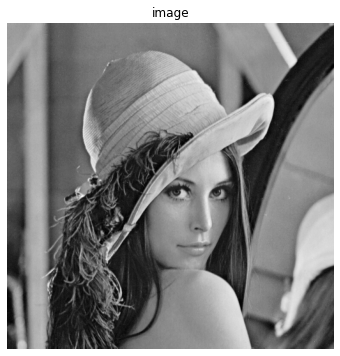

In [2]:
image = cv2.imread('data/Lena.png', 0)



#####################################################
print_image('Original','image',image,495,505,405,436)
plt.figure(figsize=(10,6))
plt_view_image(plt,[["image",image]   ])

Estimated threshold (Otsu): 124.0
------  Original-----------------    Shape(512, 512) image: uint8
[ 124 119 123 123 123 127 120 ]
[ 123 122 124 124 123 128 122 ]
[ 128 123 125 126 123 125 120 ]
[ 124 127 128 131 130 126 123 ]
[ 122 122 132 129 125 129 123 ]
[ 124 129 129 126 124 128 127 ]
[ 129 132 125 125 126 126 125 ]
[ 130 127 126 126 128 127 127 ]
[ 127 129 130 127 130 128 132 ]
[ 128 127 130 127 133 129 128 ]
------  threshold THRESH_OTSU > 124.0    Shape(512, 512) image: uint8
[ 0 0 0 0 0 1 0 ]
[ 0 0 0 0 0 1 0 ]
[ 1 0 1 1 0 1 0 ]
[ 0 1 1 1 1 1 0 ]
[ 0 0 1 1 1 1 0 ]
[ 0 1 1 1 0 1 1 ]
[ 1 1 1 1 1 1 1 ]
[ 1 1 1 1 1 1 1 ]
[ 1 1 1 1 1 1 1 ]
[ 1 1 1 1 1 1 1 ]
Populating the interactive namespace from numpy and matplotlib


<Figure size 720x432 with 0 Axes>

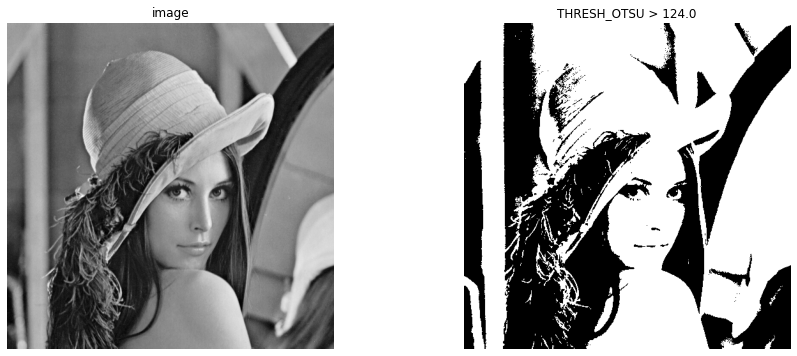

<Figure size 720x432 with 0 Axes>

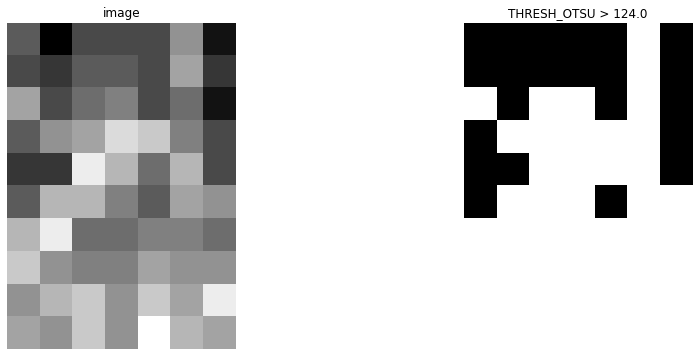

In [3]:
#CVAPI(double)  cvThreshold( const CvArr*  src, CvArr*  dst,
#                            double  threshold, double  max_value,
#                            int threshold_type );
#ret, threshold = cv2.threshold(im, 150, 200, 10)
#Здесь всё, что темнее, чем 150, заменяется на 10, а всё, что ярче, — на 200.
#max_value — максимальное значение (используется совместно с CV_THRESH_BINARY и CV_THRESH_BINARY_INV)
##define CV_THRESH_BINARY      0  /* value = value > threshold ? max_value : 0       */
#
# threshold() applies thresholding to a multiple-channel array
# It takes src, thresh, maxval, type as paramenters

otsu_thr, THRESH_OTSUbinary = cv2.threshold(image, -1, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('Estimated threshold (Otsu):', otsu_thr)


##########################################################
print_image('Original','image',image,495,505,408,415)
print_image('threshold THRESH_OTSU > {0}'.format(otsu_thr),'image',THRESH_OTSUbinary,495,505,408,415)
%pylab inline
plt.figure(figsize=(10,6))
plt_view_image(plt,[["image",image],
                    ["THRESH_OTSU > {0}".format(otsu_thr),THRESH_OTSUbinary]
                   ])
plt.figure(figsize=(10,6))
plt_view_image(plt,[["image",image[495:505,408:415]],
                    ["THRESH_OTSU > {0}".format(otsu_thr),THRESH_OTSUbinary[495:505,408:415]],
                   ])
cv2.imshow('image, threshold THRESH_OTSU binary > {0}'.format(otsu_thr), 
           np.hstack([image,np.where(THRESH_OTSUbinary > 0, np.uint8(255), np.uint8(0))   ]))
cv2.imshow('image[495:505,408:415], threshold[495:505,408:415] THRESH_OTSU binary > {0}'.format(otsu_thr), 
           np.hstack([image[495:505,408:415],
                      np.where(THRESH_OTSUbinary[495:505,408:415] > 0, np.uint8(255), np.uint8(0))   ]))
cv2.waitKey()
cv2.destroyAllWindows()

------  Original-----------------    Shape(512, 512) image: uint8
[ 114 116 114 124 119 123 123 123 127 120 130 124 123 125 119 122 117 123 120 120 120 114 111 106 99 96 98 98 99 102 101 ]
[ 115 120 120 123 122 124 124 123 128 122 123 125 125 130 124 122 116 119 114 115 115 112 107 105 105 101 101 101 99 107 106 ]
[ 118 122 120 128 123 125 126 123 125 120 123 125 120 124 128 124 120 117 115 116 114 112 105 103 106 103 102 103 107 110 114 ]
[ 120 120 124 124 127 128 131 130 126 123 126 127 124 124 128 122 118 116 112 117 115 114 112 110 109 107 107 105 112 115 118 ]
[ 128 125 125 122 122 132 129 125 129 123 125 124 129 122 124 123 119 114 118 115 115 112 114 112 109 109 111 110 117 117 124 ]
[ 127 126 125 124 129 129 126 124 128 127 128 123 128 125 124 124 124 120 120 118 115 114 112 111 111 111 112 118 123 124 124 ]
[ 124 126 127 129 132 125 125 126 126 125 124 125 125 127 126 122 122 124 124 118 117 116 117 114 111 115 116 123 126 131 128 ]
[ 128 126 129 130 127 126 126 128 127 127 12

<Figure size 720x432 with 0 Axes>

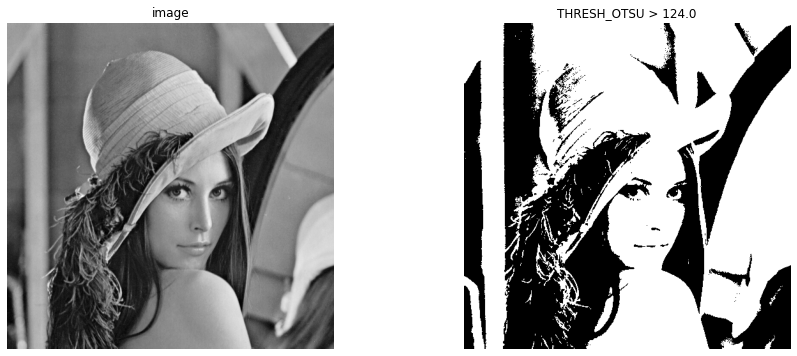

In [4]:
##########################################################
print_image('Original','image',image,495,505,405,436)
print_image('threshold THRESH_OTSU > {0}'.format(otsu_thr),'image',THRESH_OTSUbinary,495,505,405,436)
%pylab inline
plt.figure(figsize=(10,6))
plt_view_image(plt,[["image",image],
                    ["THRESH_OTSU > {0}".format(otsu_thr),THRESH_OTSUbinary]
                   ])
cv2.imshow('image, threshold THRESH_OTSU binary > {0}'.format(otsu_thr), 
           np.hstack([image,np.where(THRESH_OTSUbinary > 0, np.uint8(255), np.uint8(0))   ]))
cv2.waitKey()
cv2.destroyAllWindows()